23.03.23
### PCA 구현

- PCA : 분산을 최대로하는 축을 찾는 기법, 비지도학습
- dot product 진행을 했을때, 분산이 가장 넓은 선을 찾아준다.
- 첫번째 선은 -> principal component (설명력이 가장 좋은 선)

### feature Scaling
- normailzed to have zero mean (설명하는 값들을 모두 평균이 0이 되도록 centering를 해준다.) + Standard Scaling (Z-score)

### output
- 데이터의 차원수와 동일하게 pc 선이 생성된다.
    - ex, 2차원 데이터 -> pca선은 2개

### 선형회귀 VS PCA
- PCA는 선형회귀와 다르다 
    - 두개의 목적이 다르다.
    - linear regression은 y의 에러를 최소화하는 선을 찾아주는 것
    - pca는 직교하는 선을 찾아주는 것

### 추가 내용
- PCA는 선형이라는 가정하에 진행되기 때문에, 비선형 데이터에서는 적용하기 어려움이 있다.
    - 비선형 데이터를 차원축소를 할 때는 결과가 매번 달라질 수 있다. (축을 해석할 수 없기 때문에)
- 데이터의 차원을 축소할때 PCA가 최선의 방법은 아닐수있다.
    - 여러가지를 다양하게 사용해보고 데이터에 맞는 축소방법을 선택한다.
    - 차원축소에 다양한 방법이 존재
        - 데이터를 어떻게 축소를 할지에 대해 정확도가 달라지는것을 볼 수 있다. 
         (https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/)

        - manifold : https://scikit-learn.org/stable/modules/manifold.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
x = np.array([
    [1,1],
    [2,1],
    [3,2],
    [-1,-1],
    [-2,-1],
    [-3,-2]
])

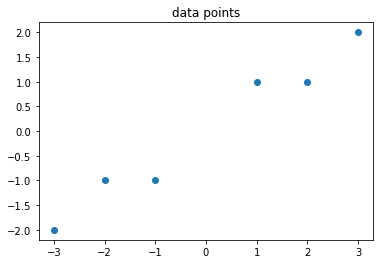

In [ ]:
plt.title("data points")
plt.scatter(x[:,0],x[:,1])

- 데이터를 가장 잘 설명하는 선을 찾으려고한다.
- 임의로 만든 2차원 데이터는 PCA를 통해 차원의 수만큼 최대 2개의 선을 추출할 수 있다. 
    - `n_components` 의 값을 통해 원하는 개수의 선만 추출할 수 있다.

- `explained_variance_ratio`를 통해 데이터 값들이 해당 축에서 얼마나 퍼져있는지를 나타내준다. 
    - 많이 퍼져 있을 수록 설명력이 좋은 선이라고 볼 수 있다.

In [ ]:
pca_1 = PCA(n_components=1) # 데이터가 2차원이라서 pc선은 최대 2개가 나올수 있다.
pca_1.fit(x)

#-- 축에 값을 투영했을 때, 값이 얼마나 퍼져있는지를 나타내준다.
pca_1.explained_variance_ratio_

array([0.99244289])

- `components_` 을 통해 PCA 결과 축을 확인해볼 수 있다. 
    - output : [ x , y ] 


In [ ]:
#- axis base line
pca_1.components_

array([[0.83849224, 0.54491354]])

- `components_` 로 확인한 축과, 데이터를 함께 시각화해본다.
    - `components_` 로 확인한 값의 길이는 1 이다. (dot product) 

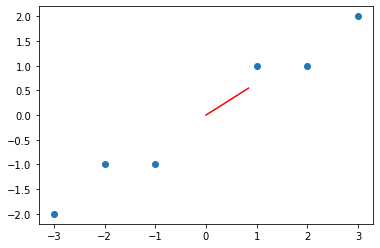

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.plot([0,pca_1.components_[0,0]], [0,pca_1.components_[0,1]], 'r-')

- 원본 데이터를 pca 선에 투영시켜서 축소시키고 복구도 시킬 수 있다. 
    - `transform` 함수를 사용해서 데이터 축소 가능
    - `inverse_transform` 함수를 사용해서 데이터 복구 가능

- 데이터 복구를 할 때는 원래의 데이터와 완전히 같게 복구하는 것은 불가능하다.

In [ ]:
#-- 원본데이터를 축소
x_trans_1 = pca_1.transform(x)

#-- 축소된 데이터를 복구
x_reduced_1 = pca_1.inverse_transform(x_trans_1)

In [ ]:
#-- 6 x 2 형태에서 6 x 1 형태로 축소된 것을 확인할 수 있다.
x_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

In [ ]:
trans_point = np.array([[k,0] for k in x_trans_1.squeeze()])

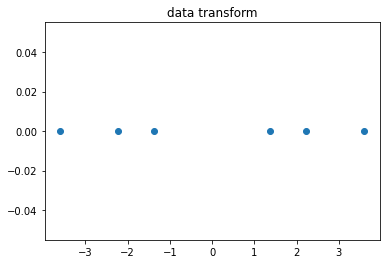

In [ ]:
plt.title("data transform")
plt.plot(
    trans_point[:,0],trans_point[:,1],"o"
)

In [ ]:
#-- 6 x 2 차원으로 복구됨
x_reduced_1

array([[ 1.15997501,  0.75383654],
       [ 1.86304424,  1.21074232],
       [ 3.02301925,  1.96457886],
       [-1.15997501, -0.75383654],
       [-1.86304424, -1.21074232],
       [-3.02301925, -1.96457886]])

- 원본 데이터와 pca를 통해 차원을 축소했다가 복구한 데이터를 확인해본 결과,
    - 데이터가 완전히 복구가 되는것은 불가능한 것을 알 수 있었다.

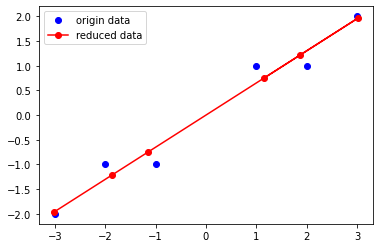

In [ ]:
plt.plot(x[:,0], x[:,1], "bo", label="origin data")
plt.plot(x_reduced_1[:,0],x_reduced_1[:,1], "ro-", label="reduced data")
plt.legend()